# New York City Airbnb Open Data 

### Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ny=pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


We can observe from the dataset,there are 488895 rows and 16 columns.

In [3]:
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
num_cols=ny.select_dtypes(exclude="object").columns
num_cols

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [6]:
cat_cols=ny.select_dtypes(include="object").columns
cat_cols

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [7]:
ny.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

There are 10 columns which has numerical values and 6 columns has categorical values.We also check the types of the columns.

In [8]:
ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
ny=ny.drop(["id","host_name","last_review"],axis=1)
ny.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
ny=ny.fillna({"reviews_per_month":0})

In [11]:
ny.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
ny.duplicated().sum()

0

## Exploratory Data Analysis 

Text(0, 0.5, 'Count')

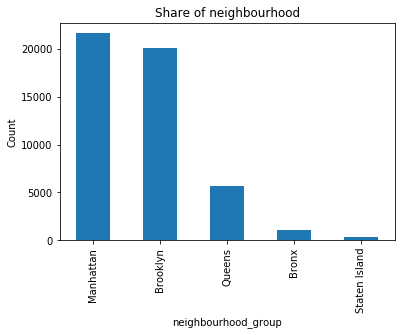

In [13]:
ny.neighbourhood_group.value_counts().plot(kind="bar")
plt.title("Share of neighbourhood")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")

Manhatten and Brooklyn have the highest share of hotels

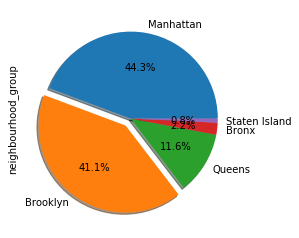

In [14]:
ny['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',shadow=True)


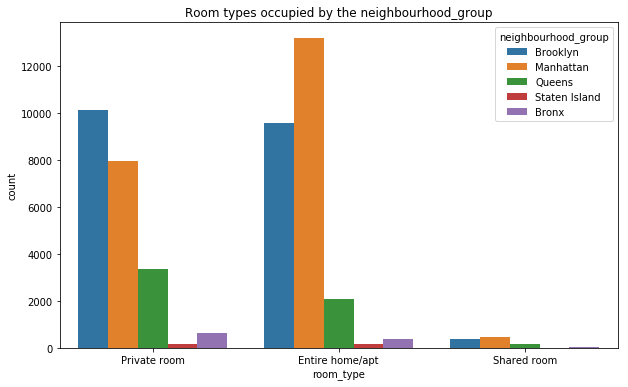

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = ny)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

We have got the Neighborhood wise share of rooms

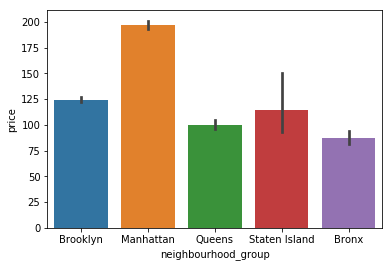

In [16]:
sns.barplot(data=ny,x="neighbourhood_group",y="price")
plt.show()

From the above plot we can observe that the prices are very high in Manhattan.

In [17]:
ny["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

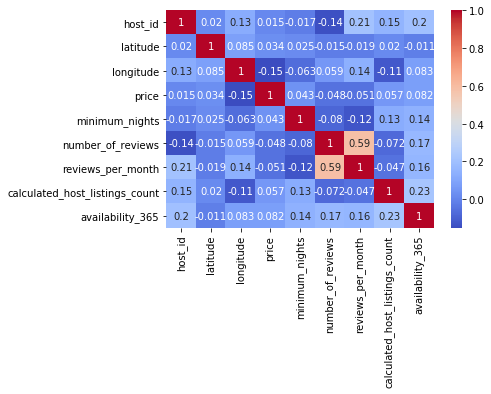

In [18]:
sns.heatmap(ny.corr(),annot=True,cmap="coolwarm")
plt.show()

From above heatmap we can find that there is no strong corelation except number_of_reviews vs reviews_per_month.

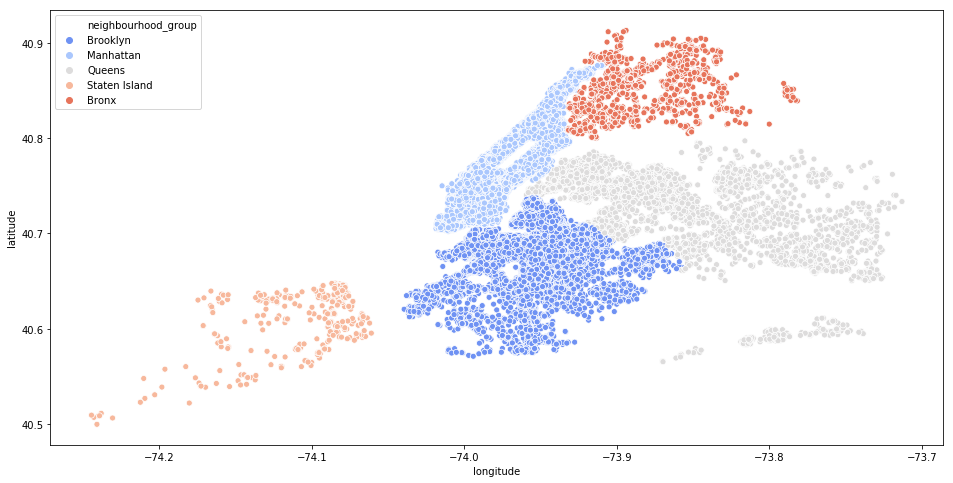

In [19]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=ny.latitude,x=ny.longitude,hue=ny.neighbourhood_group,palette="coolwarm")
plt.show()

Longitude vs Latitude (representing different neighbourhood groups)

<Figure size 720x432 with 0 Axes>

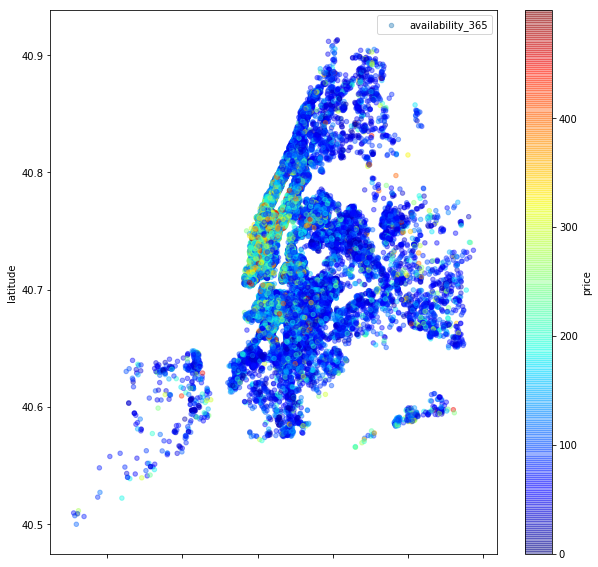

In [20]:
plt.figure(figsize=(10,6))
ny1=ny[ny.price<500]

ny1.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))

plt.show()

Comapring prices of different airbnb flats and rooms with different latitudes.Red color dots are the apartment or rooms with higher price.I have considered prices upto 300 $ to get a goo representation on the plot.We can see that Manhattan region has more expensive apartments.

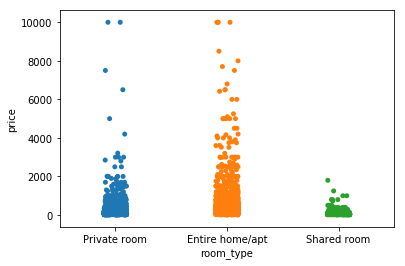

In [21]:
sns.stripplot(data=ny,x='room_type',y='price',jitter=True)

plt.show()

We can see that different room type has different price range.

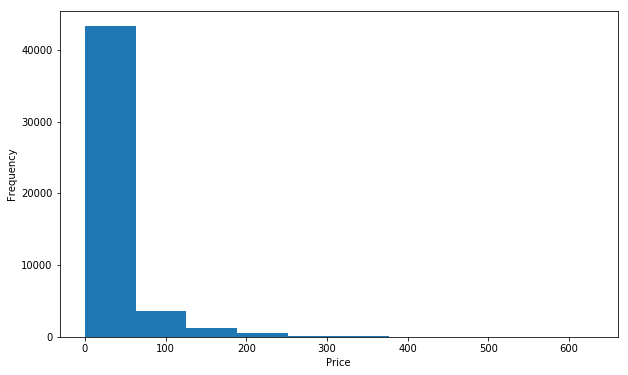

In [22]:
plt.figure(figsize=(10,6))
ny['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.show()

We can see that low cost rooms or in range 0-50 $ have more reviews

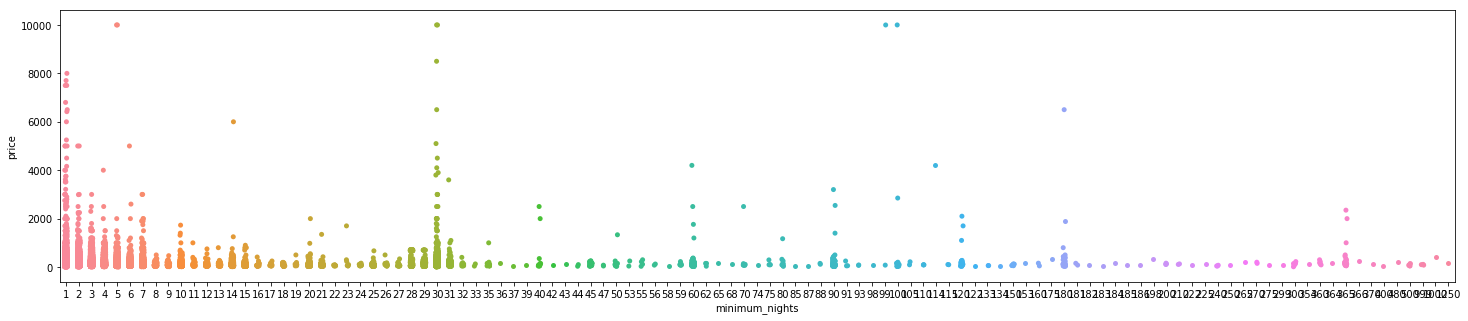

In [23]:
f,ax = plt.subplots(figsize=(25,5))
ax=sns.stripplot(data=ny,x='minimum_nights',y='price',jitter=True)
plt.show()

We can see that rooms with low minimum nights have high price.As mentioned before Home/Apt have the highest price

### Displaying rooms with maximum reviews

In [24]:
ny1=ny.sort_values(by=['number_of_reviews'],ascending=False).head(100)
ny1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


## Comparision between different models
##### Assumptions :Data is following linear regression


In [25]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE

import warnings 
warnings.filterwarnings('ignore')

In [26]:
ny["name"] = pd.get_dummies(ny['name'])
ny["neighbourhood_group"]= pd.get_dummies(ny['neighbourhood_group'])
ny["neighbourhood"]= pd.get_dummies(ny['neighbourhood'])
ny["room_type"]= pd.get_dummies(ny['room_type'])



In [27]:
ny

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,0,2845,0,0,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,0,4632,0,0,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,0,4869,0,0,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,0,7192,0,0,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,8232441,0,0,40.67853,-73.94995,0,70,2,0,0.00,2,9
48891,0,6570630,0,0,40.70184,-73.93317,0,40,4,0,0.00,2,36
48892,0,23492952,0,0,40.81475,-73.94867,1,115,10,0,0.00,1,27
48893,0,30985759,0,0,40.75751,-73.99112,0,55,1,0,0.00,6,2


### Model 1

In [28]:
X=ny.drop('price',axis=1)
y=ny['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.12475900377581939

We are using Superwise linear regression model(SLR) and the accuracy we got is 12.47%.Our model is predicting that how price is varying in newyork on different features.

### Model 2

In [31]:
rfe = RFE(lr, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lr.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True False False  True False False]
[1 6 1 1 1 1 1 5 2 1 4 3]


In [32]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    lr = LinearRegression()
    rfe = RFE(lr,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lr.fit(X_train_rfe,y_train)
    score = lr.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.103964


We are using recurssive feature elimination model and accuracy we got is 10.39% when number of features are 9. 

### Model 3

In [33]:
xc=sm.add_constant(X)
lm=sm.OLS(y,xc).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     410.3
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:20:01   Log-Likelihood:            -3.3504e+05
No. Observations:               48895   AIC:                         6.701e+05
Df Residuals:                   48882   BIC:                         6.702e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5.227e+04   1966.959    -26.576      0.000   -5.61e+04   -4.84e+04
name                             -35.0187    228.940     -0.153      0.878    -483.743     413.706
host_id                         9.662e-08   1.49e-08      6.493      0.000    6.75e-08    1.26e-07
neighbourhood_group              -48.6887      7.726     -6.302      0.000     -63.831     -33.546
neighbourhood                     11.7782     36.036      0.327      0.744     -58.853      82.409
latitude                         238.8920     20.167     11.845      0.000     199.363     278.421
longitude                       -576.3336     23.887    -24.128      0.000    -623.152    -529.515
room_type                        114.0089      2.130     53.525      0.000     109.834     118.184
minimum_nights                    -0.0324      0.052     -0.622      0.534      -0.134       0.070
number_of_reviews                 -0.1875      0.031     -6.051      0.000      -0.248      -0.127
reviews_per_month                 -4.5483      0.870     -5.228      0.000      -6.254      -2.843
calculated_host_listings_count    -0.1122      0.033     -3.369      0.001      -0.178      -0.047
availability_365                   0.1886      0.009     22.061      0.000       0.172       0.205
==============================================================================
Omnibus:                   110027.366   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        971923441.256
Skew:                          21.285   Prob(JB):                         0.00
Kurtosis:                     692.387   Cond. No.                     1.97e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X=X.drop("minimum_nights",axis=1)

In [35]:
xc=sm.add_constant(X)
lm=sm.OLS(y,xc).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     447.5
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:20:01   Log-Likelihood:            -3.3504e+05
No. Observations:               48895   AIC:                         6.701e+05
Df Residuals:                   48883   BIC:                         6.702e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5.222e+04   1965.198    -26.574      0.000   -5.61e+04   -4.84e+04
name                             -34.8508    228.938     -0.152      0.879    -483.572     413.871
host_id                         9.693e-08   1.49e-08      6.518      0.000    6.78e-08    1.26e-07
neighbourhood_group              -48.6003      7.724     -6.292      0.000     -63.740     -33.460
neighbourhood                     11.8360     36.036      0.328      0.743     -58.794      82.466
latitude                         238.4899     20.157     11.832      0.000     198.982     277.998
longitude                       -575.8552     23.874    -24.120      0.000    -622.649    -529.061
room_type                        113.9376      2.127     53.570      0.000     109.769     118.106
number_of_reviews                 -0.1869      0.031     -6.035      0.000      -0.248      -0.126
reviews_per_month                 -4.5029      0.867     -5.194      0.000      -6.202      -2.804
calculated_host_listings_count    -0.1138      0.033     -3.426      0.001      -0.179      -0.049
availability_365                   0.1878      0.008     22.234      0.000       0.171       0.204
==============================================================================
Omnibus:                   110015.557   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        971217224.767
Skew:                          21.279   Prob(JB):                         0.00
Kurtosis:                     692.136   Cond. No.                     1.97e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are using OLS model and we have dropped three features name,neighbourhood,minimum nights and the accuracy we got is 9.1%

**So we are using SLR model because it gives the highest accuracy 12.47%.** 

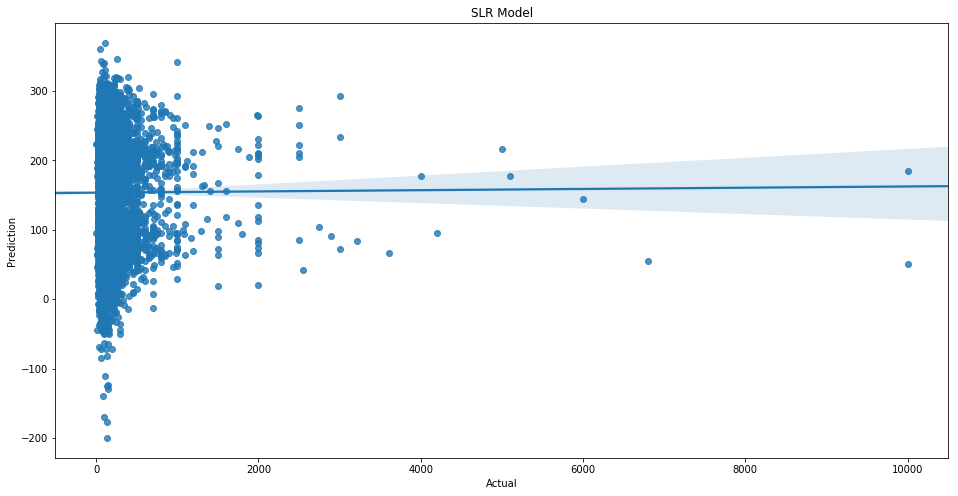

In [36]:
plt.figure(figsize=(16,8))
sns.regplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("SLR Model")
plt.grid(False)
plt.show()

There is high concentration of prediction value between 0 to 1000.
>The accuracy of the model is low because the data is not equally spread along the linear regression line.
